# Insper
# Informação Georreferenciada
# Exercício - Análise de Pontos


O conhecido mapa da cólera de John Snow é frequentemente citado como um dos primeiros exemplos do uso da pesquisa geográfica e análise espacial para entender uma epidemia. Começando em 31 de agosto de 1854, um surto de cólera atingiu o distrito de Londres chamado *Soho*. Ao longo de três dias, 127 pessoas morreram da doença e, em 10 de setembro, mais de 500 haviam morrido. Esta investigação usou técnicas de análise que hoje provavelmente envolveriam o uso de Sistemas de Informações Geográficas (SIGs). A análise de Snow demonstra o poder dos mapas e das informações subjacentes para visualizar e resolver problemas complicados.


A cólera se espalhou para as Ilhas Britânicas no início da década de 1830 devido à falta de saneamento e equívocos sobre suas causas. Hoje sabemos que a doença é causada por uma bactéria e geralmente é transmitida através de água potável contaminada. **O médico conseguiu, através da conversa com os moradores locais e sua análise espacial das mortes por cólera, determinar que sua suspeita sobre a origem da doença era realmente verdadeira, uma bomba de água na Broad Street**. Snow mapeou os locais dos poços de água locais e as mortes de cólera para apoiar seu argumento sobre a bomba contaminada, convencendo o conselho local a remover a alça para impedir seu uso.


O mapa de Snow, demonstrando o agrupamento espacial de mortes por cólera ao redor do poço de Broad Street, forneceu forte evidência em apoio à sua teoria de que a cólera era uma doença transmitida pela água.

Neste exercício vamos reproduzir o trabalho de John Snow. Faremos uso das principais técnicas para análises de pontos, que hoje são facilmente executadas por meio de ferramentas computacionais, mas que demonstram a vanguarda e pioneirismo de Snow.

Este código executa no **Google Colab**, mas fique à vontade para executá-lo em sua máquina.


---


## Passo 1: Instale os pacotes necessários:

In [ ]:
!pip install geopandas geopy pointpats fiona pygeos --quiet


## Importe as bibliotecas necessárias



In [ ]:

import numpy as np #para processamento numérico em Python
import matplotlib.pyplot as plt #para os gráficos
import geopandas as gpd #para a leitura de shapefiles
import seaborn as sns #para fazer o mapa de kernel
from matplotlib.patches import Ellipse #para projetar a elipse

# pointpats --> análise espacial de pontos
from pointpats.centrography import hull, mbr, mean_center, weighted_mean_center, manhattan_median, std_distance,euclidean_median,ellipse
from pointpats import PointPattern
import pointpats.quadrat_statistics as qs
from pointpats.distance_statistics import G, F, K, Genv, Fenv, Kenv
from pointpats import PoissonPointProcess


/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


### Faça upload do colab dos arquivos shape (Pumps, Cholera_Deaths) e na sequência faça a leitura deles por meio do Geopandas.

In [ ]:
Cholera_Deaths = gpd.read_file('Cholera_Deaths.shp')

Cholera_Deaths.head()

Cholera_Deaths.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [ ]:
Pumps = gpd.read_file('Pumps.shp')

Pumps.head()

Pumps.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [ ]:
polygons = gpd.read_file('polygons.shp')

### Verifique os sistemas de coordenadas usados para as bombas de água e para as mortes. O que você pode dizer sobre ele, considerando que estamos nos referindo a Londres?

### Faça um gráfico com as bombas (em vermelho) e as mortes (em preto). A figura deve ter tamanho (10,8).

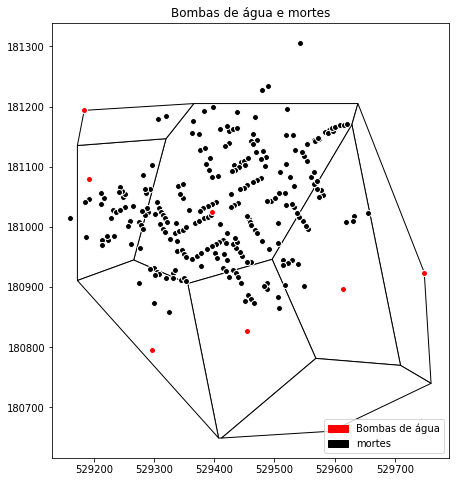

In [ ]:
import matplotlib.patches as mpatches

Bombas_de_agua = mpatches.Patch(color='red', label='Bombas de água')
mortes = mpatches.Patch(color='black', label='mortes')

fig, grafico = plt.subplots(figsize=(10,8))
polygons.plot(ax = grafico, color= "white", edgecolor ="k")
Cholera_Deaths.plot(ax = grafico, color='black', edgecolor='white')
Pumps.plot(ax = grafico, color='red', edgecolor='white')
plt.title('Bombas de água e mortes')
plt.legend(handles=[Bombas_de_agua, mortes], loc='lower right')
plt.show()

### Extraia a longitude (x) e latitude (y) a partir da coluna geometry do shapefile Cholera_Deaths e, com uso destes dois, crie um objeto do tipo PointPattern para que possa executar as principais análises envolvendo pontos.

In [ ]:
x= Cholera_Deaths['geometry'].x
y= Cholera_Deaths['geometry'].y

In [ ]:
pontos = np.vstack((x,y)).T

In [ ]:
pp = PointPattern(pontos)

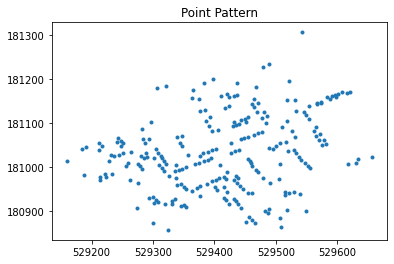

In [ ]:
pp.plot()

### Calcule o Centro Médio e Projete

In [ ]:
mc = mean_center(pp.points)

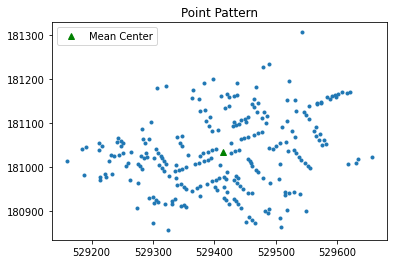

In [ ]:
pp.plot()
plt.plot(mc[0], mc[1], 'g^', label="Mean Center")
plt.legend()

### Calcule a distância padrão e projete o círculo de distância padrão

In [ ]:
stdd = std_distance(pp.points)

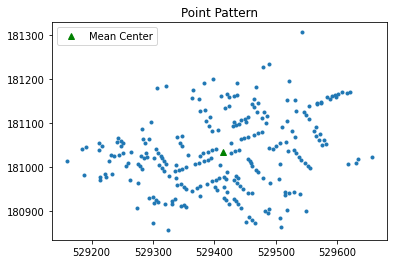

In [ ]:
pp.plot()
plt.plot(mc[0], mc[1], 'g^', label="Mean Center")
plt.legend()

[]

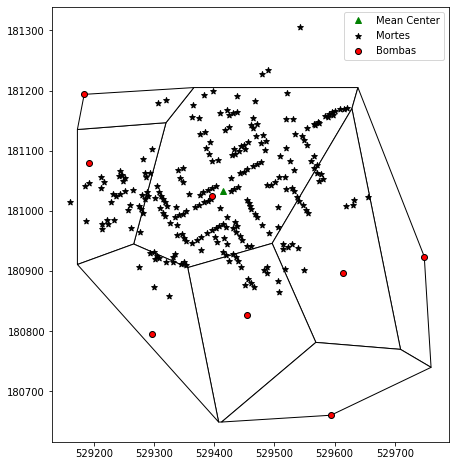

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
polygons.plot(ax = ax, color= "white", edgecolor ="k")
Cholera_Deaths.plot(ax =ax, color= 'black', marker='*',label='Mortes')
Pumps.plot(ax =ax, color= 'red', edgecolor='k',label='Bombas')
plt.plot(mc[0], mc[1], 'g^', label="Mean Center")
plt.legend()
plt.plot()



In [ ]:
stdd =std_distance(pp.points)

In [ ]:
stdd

137.09593350245717

[]

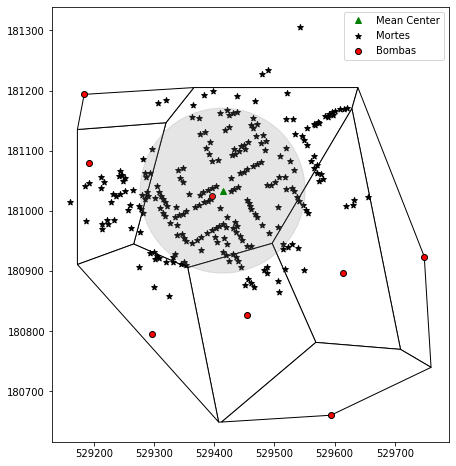

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
polygons.plot(ax = ax, color= "white", edgecolor ="k")
Cholera_Deaths.plot(ax =ax, color= 'black', marker='*',label='Mortes')
Pumps.plot(ax =ax, color= 'red', edgecolor='k',label='Bombas')
circle1=plt.Circle((mc[0], mc[1]),stdd,color='gray', alpha = 0.2)
ax.add_artist(circle1)
plt.plot(mc[0], mc[1], 'g^', label="Mean Center")
plt.legend()
plt.plot()





### Calcule e projete a elipse padrão

In [ ]:
sx, sy, theta = ellipse(pp.points)

In [ ]:
theta_degree = np.degrees(theta)

In [ ]:
elipse = Ellipse(xy=mean_center(pp.points),
                width=sx*2,
                height=sy*2,
                angle = -theta_degree,
                color='grey',
                alpha = 0.2)


[]

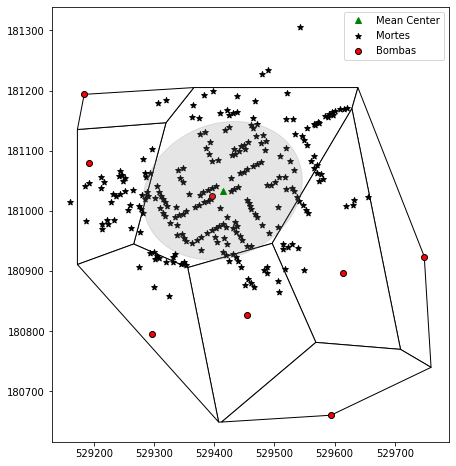

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
polygons.plot(ax = ax, color= "white", edgecolor ="k")
Cholera_Deaths.plot(ax =ax, color= 'black', marker='*',label='Mortes')
Pumps.plot(ax =ax, color= 'red', edgecolor='k',label='Bombas')
ax.add_artist(elipse)
plt.plot(mc[0], mc[1], 'g^', label="Mean Center")
plt.legend()
plt.plot()


### Calcule e projete o Quadrats retangulares, 3x3

In [ ]:
q_r = qs.QStatistic(pp, shape='rectangle', nx=3, ny=3)

Aqui, quanto maior o qui quadrado, maior o grau de clusterização. Este indicador geralmente é usado quando temos dois grupos de dados para comparar qual deles é mais clusterizado.
Neste caso, como não há um outro conjunto de dados a ser analisado
observamos apenas que o qui quadrado dos dados aqui em questão é alto, o que nos sugere que possivelmente há clusterização



In [ ]:
q_r.chi2_pvalue

5.956733903969489e-23

Os quadrats, por sua vez, apesar de serem um ferramental mais antigo e não tão usado atualmente, é uma prática interessante para que possamos observar se em algum quadrante há uma concentração maior ou menor de pontos

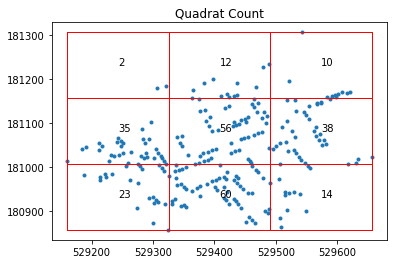

In [ ]:
q_r.plot()

### Densidade: Faça um mapa de kernel para estes pontos

Com o mapa de Kernel, por sua vez, é possível visualizar que há uma "região de calor" mais proeminente do que outras o que nos leva a crer que os dados podem sim estar de fato clusterizados com maior foco de mortes num ponto só. O que poderia - e de fato veio à época - suscitar a questão de que os focos de casos partiam de um ponto específico e estavam se alastrando para outros.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

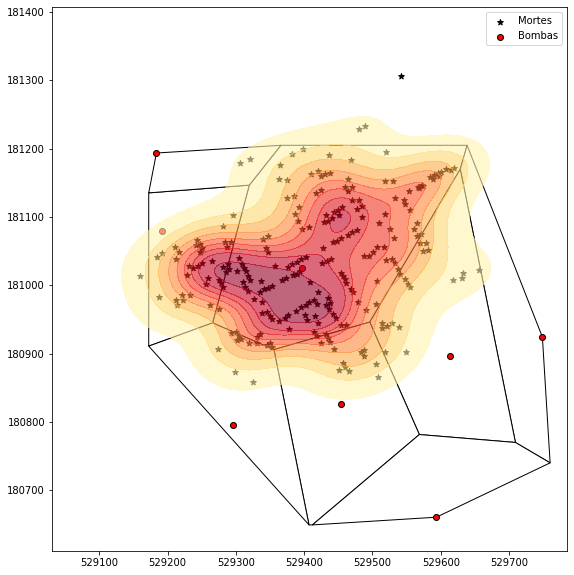

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
polygons.plot(ax = ax, color= "white", edgecolor ="k")
Cholera_Deaths.plot(ax =ax, color= 'black', marker='*',label='Mortes')
Pumps.plot(ax =ax, color= 'red', edgecolor='k',label='Bombas')
sns.kdeplot(pontos[:,0], pontos[:,1], shade=True, cmap='YlOrRd', ax=ax, alpha=0.6)
plt.legend()
plt.plot()#;
#%config InlineBackend.figure_format='retina'

### calcule a função K, e os envelopes de confiança com 2000 iterações (CSR)

Função de K de Ripley

In [ ]:
kp = K(pp)

No gráfico abaixo podemos trazer a seguinte interpretação:
no eixo X nós medimos a medida de raio de distância que um elemento possui do seus outros vizinhos e no eixo Y é verificado o quanto de vizinhos existem dentro desse círculo.
Sendo assim, na curva laranja temos descrito um processo aleatório de poisson: ou seja, se os dados estivessem aleatoriamente distribuídos para cada distância do eixo X seriam esperados encontrarem tantos vizinhos quantos os do eixo Y assinalados pela curva laranja.
Todavia, aqui em nosso caso, a curva azul fica bem acima da laranja, o que indica que para cada distância são encontrados mais vizinhos do que o que seria esperado para uma distribuição aleatória, ou seja, novamente há um forte indicador de que pode haver clusterização no ponto da The Broad Street Pump


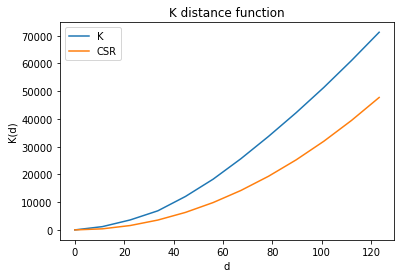

In [ ]:
kp.plot()
plt.legend()

Envelopes


In [ ]:
realizations = PoissonPointProcess(pp.window, pp.n, 2000, asPP = True )

In [ ]:
from pointpats.distance_statistics import Kenv

O k de ripley com envelope nos apresenta o intervalo de confiança: caso o nosso gráfico se situasse dentro do intervalo de confiança, indicaria que o processo teria chance de ser um processo estocático,mas como a curva K que descreve nossos dados está muito acima do IC, isso significa que há evidências estatísticas para afirmar que de fato havia um cluster de casos de mortes pela cólera em nosso exemplo.

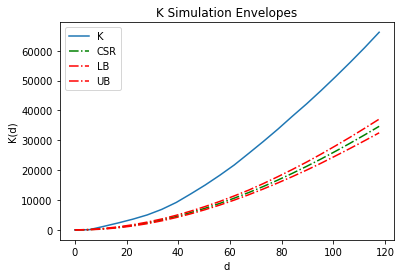

In [ ]:
kenv = Kenv(pp, intervals=20, realizations=realizations)
kenv.plot()

Por fim, com base nos gráficos bem como nas evidências estatísticas, é possivel concluir que de fato havia clusterização dos focos de morte:
nota-se que o cluster se aproximava de uma das bombas de água a qual era a The Broad Street Pump e que, uma vez contaminada, acabou por provocar inúmeros casos da doença dentro do raio que circunscrevia aquele ponto (conforme foi possível verificar no mapa o próprio John Snow elaborou à época).